#PIL - Python Imaging Library

In [ ]:
#Importig Library
import PIL

In [ ]:
#Version?
PIL.__version__

'7.0.0'

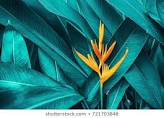

In [ ]:
from PIL import Image
# Import the display functionality
from IPython.display import display

image = Image.open('/content/leaf.jpg')
display(image)

**IMAGE FILTERS**

BLUR

CONTOUR

DETAIL

EDGE_ENHANCE

EDGE_ENHANCE_MORE

EMBOSS

FIND_EDGES

SHARPEN

SMOOTH

SMOOTH_MORE

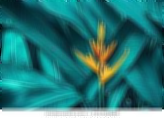

In [ ]:
from PIL import ImageFilter
image = image.convert('RGB') 
blurred_image = image.filter(PIL.ImageFilter.BLUR)
display(blurred_image)

In [ ]:
#Image width and height
print("{}x{}".format(image.width, image.height))

164x118


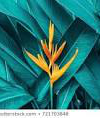

In [ ]:
#the left at, 50 pixels, and the top at 0 pixels, then to the right another 190 pixels, and set the lower bound to 150 pixels
display(image.crop((50,0,150,118)))

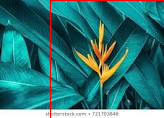

In [ ]:
from PIL import ImageDraw
drawing_object=ImageDraw.Draw(image)
drawing_object.rectangle((50,0,190,150), fill = None, outline ='red')
display(image)

##Image Basics

In [ ]:
#Image Info
import numpy as np
import matplotlib.pyplot as plt
A = plt.imread('/content/leaf.jpg')
print(A)

[[[  6  42  40]
  [  0  36  34]
  [  0  32  30]
  ...
  [  4  78  89]
  [  0  74  85]
  [  0  76  86]]

 [[  3  39  39]
  [  2  38  38]
  [  1  37  37]
  ...
  [  2  79  89]
  [  6  83  93]
  [  8  85  95]]

 [[  0  37  36]
  [  0  39  38]
  [  4  40  40]
  ...
  [ 18  98 107]
  [ 27 107 116]
  [ 27 107 116]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
print(np.shape(A))

(118, 164, 3)


In [ ]:
print(type(A))

<class 'numpy.ndarray'>


In [ ]:
print(A.dtype)

uint8


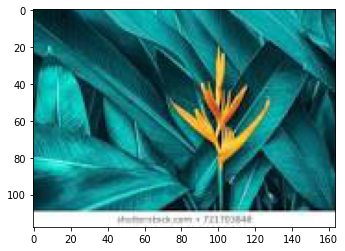

In [ ]:
plt.imshow(A)

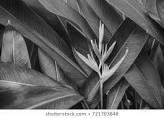

In [ ]:
#Grayscale
from PIL import Image
img = Image.open('/content/leaf.jpg')
img.convert('L')

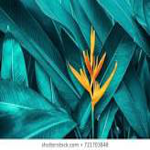

In [ ]:
#Resize
from PIL import Image
smaller_img = img.resize((150,150))
display(smaller_img)

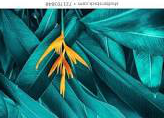

In [ ]:
#Rotation
from PIL import Image
rotated_img = img.rotate(180)
display(rotated_img)

In [ ]:
#.JPG to .PNG
from PIL import Image
import os
filel = ['/content/leaf.jpg']
for infile in filel:
  outfile =os.path.splitext(infile)[0]+".png"
  if infile !=outfile:
    try:
      Image.open(infile).save(outfile)
    except  IOError:
     print("Cannot convert"),infile

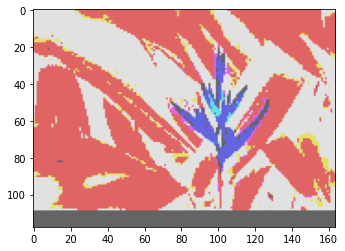

In [ ]:
#Binarization
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import *
from skimage import data
im0 = array(Image.open('/content/leaf.jpg')) 
plt.imshow(im0,cmap = cm.gray)
thres = np.zeros(shape(im0)).astype('uint8')
threshold = 100
thres[im0<threshold] =225
thres[im0 >=threshold] = 100
plt.imshow(thres,cmap=cm.gray)
plt.show()

##Histogram and Equalizattion

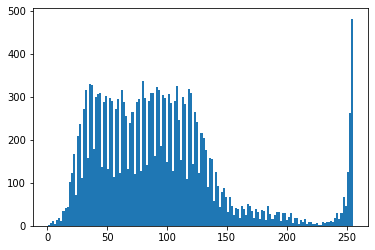

In [ ]:
#Histogram
from PIL import Image
from pylab import *
img = Image.open('/content/leaf.jpg').convert('L')
img_array = array(img)
figure()
hist(img_array.flatten(),150)  #flatten - as histogram takes 1D array as input
show()

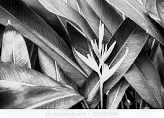

In [ ]:
#Equalizing the Image Histogram (to improve contrast)
from PIL import Image
import numpy as np
import scipy.misc , math
import scipy as sc
img = Image.open('/content/leaf.jpg').convert('L')
img1 = np.asarray(img)
flat = img1.flatten()

hist, bins = np.histogram(img1,256,[0,255])

cdf = hist.cumsum()                          #cdf = cumulative distributive function
cdf_m = np.ma.masked_equal(cdf,0)            #cdf - probability of taking the value less than or equal to 

num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m

cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[flat]
img3 = np.reshape(img2,img1.shape)
img4 = Image.fromarray(img3)
img4.show()
img4

##Image Creation

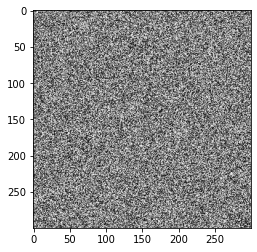

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


x = np.random.randint(0,255,(300,300)).astype('uint8')
plt.imshow(x,cmap = cm.gray)

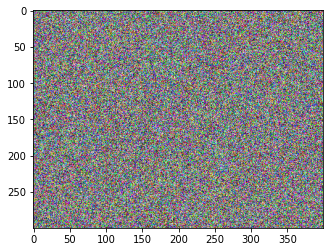

In [ ]:
y  = np.random.randint(0,255,(300,400,3)).astype('uint8')
plt.imshow(y)

In [ ]:
#Creating and wirting an image
from PIL import Image, ImageDraw
 
img = Image.new('RGB', (100, 30), color = (90, 100, 250))
 
d = ImageDraw.Draw(img)
d.text((10,10), "Hello World", fill=(255,255,0))
 
display(img)

##Contact Sheet

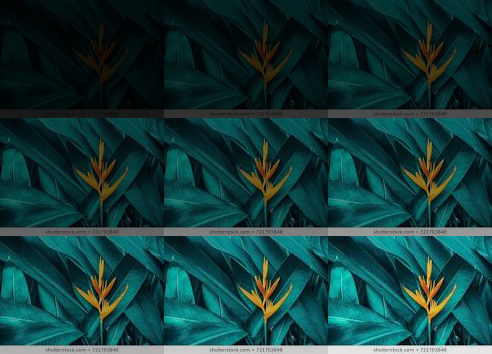

In [ ]:
import PIL
from PIL import Image
from PIL import ImageEnhance

# read image and convert to RGB
image=Image.open('/content/leaf.jpg')

# build a list of 9 images which have different brightnesses
enhancer = ImageEnhance.Brightness(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image = images[0]
contact_sheet = PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))

x=0
y=0

for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0 and update Y as well to point to the next "line" of the contact sheet.
    if x + first_image.width == contact_sheet.width:
        x = 0
        y = y + first_image.height
    else:
        x=x+first_image.width

display(contact_sheet)


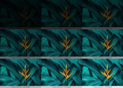

In [ ]:
# resize and display the contact sheet
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)